In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [78]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [80]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [79]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [81]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [56]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# here count is the target variable, which is the sum of casual and registerd variables.
In this solution i will predict both casual and redistered variables seperatly and add them to predict count variable

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

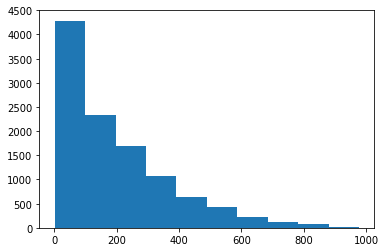

In [82]:
plt.hist(train["count"])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <a list of 10 Patch objects>)

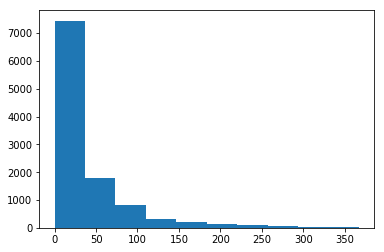

In [83]:
plt.hist(train['casual'])

(array([4459., 2694., 1775.,  873.,  461.,  262.,  142.,  126.,   81.,
          13.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <a list of 10 Patch objects>)

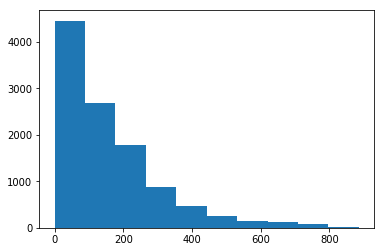

In [84]:
plt.hist(train['registered'])

This is right skewed, therefore we can apply log transfromation

In [85]:
train["datetime"]=pd.to_datetime(train.datetime)
train["date"]=train.datetime.dt.day
train["hour"]=train.datetime.dt.hour
train["month"]=train.datetime.dt.month
train.dtypes
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1


In [86]:
test["datetime"]=pd.to_datetime(test.datetime)
test["date"]=test.datetime.dt.day
test["hour"]=test.datetime.dt.hour
test["month"]=test.datetime.dt.month
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,0,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,2,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,3,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,4,1


# creating dataset according to registered user

In [87]:
train.corr()['registered']

season        0.164011
holiday      -0.020956
workingday    0.119460
weather      -0.109340
temp          0.318571
atemp         0.314635
humidity     -0.265458
windspeed     0.091052
casual        0.497250
registered    1.000000
count         0.970948
date          0.019111
hour          0.380540
month         0.169451
Name: registered, dtype: float64

# the correlation shows that registerd users are more likely to travel(generate deman) than casual users
also date, holiday and windspeed has less correlation, therefore are less significant, i can drop them

In [88]:
trainRegistered=train.drop(['holiday','windspeed','date','datetime'],axis=1)#removing datetime as necessary features are extracted.
#train.drop(['datetime'],axis=1,inplace=True)

In [89]:
testRegistered=test.drop(['holiday','windspeed','date','datetime'],axis=1)

In [90]:
trainRegistered.head()

,season,workingday,weather,temp,atemp,humidity,casual,registered,count,hour,month
0,1,0,1,9.84,14.395,81,3,13,16,0,1
1,1,0,1,9.02,13.635,80,8,32,40,1,1
2,1,0,1,9.02,13.635,80,5,27,32,2,1
3,1,0,1,9.84,14.395,75,3,10,13,3,1
4,1,0,1,9.84,14.395,75,0,1,1,4,1


In [91]:
trainRegistered.isnull().sum() #check for null data, empty values

season        0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
casual        0
registered    0
count         0
hour          0
month         0
dtype: int64

In [92]:
testRegistered.isnull().sum()

season        0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
hour          0
month         0
dtype: int64

In [93]:
#function to calculate rmsle 
def rmsle(y, y_):
	#np.nan_to_num replaces nan with zero and inf with finite numbers
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
	#taking squares
    calc = (log1 - log2) ** 2
	#taking mean and then square
    return np.sqrt(np.mean(calc))
# import math

# #A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
# def rmsle(y, y_pred):
# 	assert len(y) == len(y_pred)
# 	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
# 	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

# predicting registerd user

# decision tree


In [94]:
from sklearn.tree import DecisionTreeRegressor
dt_regRegistered = DecisionTreeRegressor(max_depth=10)

In [118]:
YR=trainRegistered['registered'].copy()
X=trainRegistered.drop(['registered','casual','count'],axis=1)
from sklearn.model_selection import train_test_split
X_trainR,X_testR,Y_trainR,Y_testR=train_test_split(X,YR,test_size=0.10,random_state=14)

In [119]:
dt_regRegistered.fit(X_trainR,Y_trainR)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [120]:
predict = dt_regRegistered.predict(X_testR)

In [121]:
rmsle(predict,Y_testR)

0.45475409179702925

In [99]:
PredictedRegistered

array([ 10.        ,   3.71428571,   1.89473684, ..., 192.        ,
       115.35483871,  62.8       ])

# creating dataset according to casual users

In [100]:
train.corr()['casual']

season        0.096758
holiday       0.043799
workingday   -0.319111
weather      -0.135918
temp          0.467097
atemp         0.462067
humidity     -0.348187
windspeed     0.092276
casual        1.000000
registered    0.497250
count         0.690414
date          0.014109
hour          0.302045
month         0.092722
Name: casual, dtype: float64

# season, date, holiday and windspeed has less correlation, therefore are less significant, i can drop them

In [101]:
trainCasual=train.drop(['season','holiday','windspeed','date','datetime'],axis=1)#removing datetime as necessary features are extracted.
#train.drop(['datetime'],axis=1,inplace=True)

In [102]:
testCasual=test.drop(['season','holiday','windspeed','date','datetime'],axis=1)

In [103]:
trainCasual.head()

,workingday,weather,temp,atemp,humidity,casual,registered,count,hour,month
0,0,1,9.84,14.395,81,3,13,16,0,1
1,0,1,9.02,13.635,80,8,32,40,1,1
2,0,1,9.02,13.635,80,5,27,32,2,1
3,0,1,9.84,14.395,75,3,10,13,3,1
4,0,1,9.84,14.395,75,0,1,1,4,1


In [104]:
trainCasual.isnull().sum() #check for null data, empty values

workingday    0
weather       0
temp          0
atemp         0
humidity      0
casual        0
registered    0
count         0
hour          0
month         0
dtype: int64

In [105]:
testCasual.isnull().sum()

workingday    0
weather       0
temp          0
atemp         0
humidity      0
hour          0
month         0
dtype: int64

# building model for casual user using random forest

In [122]:
YR=trainCasual['casual'].copy()
X=trainCasual.drop(['registered','casual','count'],axis=1)
from sklearn.model_selection import train_test_split
X_trainC,X_testC,Y_trainC,Y_testC=train_test_split(X,YR,test_size=0.10,random_state=14)

In [123]:
from sklearn.ensemble import RandomForestRegressor
rfCasual=RandomForestRegressor(n_estimators=300,random_state=0)
rfCasual.fit(X_trainC,Y_trainC)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [124]:
rfCasual.fit(X_trainC, Y_trainC)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [125]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rfCasual,X=X_trainC,y=Y_trainC,scoring='r2',cv=5)
print (accuracies)
print (accuracies.mean())


[0.87334403 0.87394807 0.85865787 0.8535296  0.87401536]
0.8666989848998206


In [126]:
predict = rfCasual.predict(X_testC)

In [127]:
rmsle(predict,Y_testC)

0.5586872167500195

# Applying model on test data


In [128]:
PredictedRegistered=dt_regRegistered.predict(testRegistered)
PredictedCasual=rfCasual.predict(testCasual)

In [129]:
PredictedCount=PredictedCasual+PredictedRegistered

In [132]:
answerNew2=pd.DataFrame()
answerNew2['datetime']=test['datetime']
answerNew2['count']=PredictedCount
answerNew2.to_csv("answerNew2.csv",header=True,index=False)

In [131]:
# answerNew